In this Notebook we try to develop a decision tree model that can be able to predict pediatric Malaria based on signs and symptoms. Malaria is common disease in Kenya that still affects many children in the country. A Rapid Diagnostic Test (RDT) is commonly used to clinically diagnosed Malaria. The model therefore tries to predict where a child has a positive or negative RDT based on features in the dataset. 
 

# **Import Libraries**

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import os
import seaborn as sns

# **Data Acquisition**

In [2]:
#The dataset is stored locally in a google drive

from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
# Defining the path to the data directory
Path = '/content/drive/MyDrive/SaaS/AI/ML/'
os.listdir(Path)

['Kakamegadataset.csv']



> ## **Data Exploration**


In [4]:
dataset= pd.read_csv("/content/drive/MyDrive/SaaS/AI/ML/Kakamegadataset.csv")

#viewing the first five rows in the data using the head() method
dataset.head()

,Age,Sex,Year,Month,Onset,Hallucinations,Rhonchi,Crepitations,Panic attacks,Cold Extremeties,Neck stiffness,Skin Pustules,Peripheral Edema,Sweating,Eye Discharge,Loss of consciousness,Chest Indrawing,Wheezing,Chest Congestion,Rhinorrhea,GBM,Hotness of Body,Inability to swallow,Feeding Difficulties,Chills,Headache,Loss of Appetite,Cough,Convulsion,Abdominal Pain,Nausea,Difficulty in Breathing,Diarrhoea,Dehydration,Chest wall indrawing,Malnutrition,Pallor,Irritable,Melena,Nasal Flaring,Vomiting,Delayed Milestone,Tachypnea,Grunting,Palpitations,Abdominal Distention,Jaundice,Hydrocephalus,Oral sores,Sick Looking,Positive RDT,Highest Temperature,Labs,Diagnosis,Treatment,Outcome,Medical Insuarance,Nationality,County,Residence
0,1,M,2019,September,7,No,No,No,No,No,No,Yes,No,No,No,No,No,No,yes,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,36.7,NaN,Septisemia,Ceftriaxone\n Flagyl\n Nyastatin\n IV Hydrocor...,Dead,None,Kenya,Kakamega,Fubuye
1,1,M,2020,May,1,No,No,No,Yes,No,No,No,No,Yes,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,Yes,No,38.9,""" WBC - 10. 2 (10^9)L \n Lymph# - 4.1 (10^9)L...",Panic Attacks,Paracetamol 5mls\nCeftriaxone 600mg,Alive,NHIF,Kenyan,Kakamega,Ivonda
2,1,M,2020,January,2,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,Yes,No,No,Yes,No,No,No,No,No,Yes,No,No,No,No,Yes,No,No,No,Yes,No,36.9,NaN,Pneumonia,"Benzyl Penicillin 400,000 IV\n Gentamycin 40 m...",Referred,None,Kenya,Kakamega,Shinyalu
3,2,M,2020,April,3,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,Yes,No,No,Yes,Yes,No,No,No,No,No,Yes,No,Yes,No,38.8,WBC - 16.4 (10^9)L \n Lymph# - 5.0 (10^9)L \n...,Hydrocephalus,Paracetamol 90mg\nCeftriaxone 400mg\n,Alive,None,Kenyan,Kakamega,Shikokho
4,5,F,2020,May,3,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,39.5,WBC - 17.0 (10^9)L \n Lymph# - 3.2 (10^9)L \n...,Septisemia,"X penicillin 900,000IV\nGentamycin 135mg\nPara...",Alive,NHIF,Kenyan,Kakamega,Masiyenze


In [5]:
#size of data

dataset.shape

(192, 60)

# **Pre-processing**


In [6]:
#List of all columns in the dataset
dataset.columns

Index(['Age', 'Sex', 'Year', 'Month', 'Onset', 'Hallucinations', 'Rhonchi',
       'Crepitations', 'Panic attacks', 'Cold Extremeties', 'Neck stiffness',
       'Skin Pustules', 'Peripheral Edema', 'Sweating', 'Eye Discharge',
       'Loss of consciousness', 'Chest Indrawing', 'Wheezing',
       'Chest Congestion', 'Rhinorrhea', 'GBM', 'Hotness of Body',
       'Inability to swallow', 'Feeding Difficulties', 'Chills', 'Headache',
       'Loss of Appetite', 'Cough', 'Convulsion', 'Abdominal Pain', 'Nausea',
       'Difficulty in Breathing', 'Diarrhoea', 'Dehydration',
       'Chest wall indrawing', 'Malnutrition', 'Pallor', 'Irritable', 'Melena',
       'Nasal Flaring', 'Vomiting', 'Delayed Milestone', 'Tachypnea',
       'Grunting', 'Palpitations', 'Abdominal Distention', 'Jaundice',
       'Hydrocephalus', 'Oral sores', 'Sick Looking', 'Positive RDT',
       'Highest Temperature', 'Labs', 'Diagnosis', 'Treatment', 'Outcome',
       'Medical Insuarance', 'Nationality', 'County', 'Resid

Before devoloping the decision tree we will dropsome columns that are unfit for the development of the  model.

In [7]:
#we will use the drop method from pandas

dataset.drop(["Labs", "Diagnosis",	"Treatment","Outcome","Medical Insuarance",	"Nationality",	"County",	"Residence"], axis = 1,inplace = True)
dataset.head()

,Age,Sex,Year,Month,Onset,Hallucinations,Rhonchi,Crepitations,Panic attacks,Cold Extremeties,Neck stiffness,Skin Pustules,Peripheral Edema,Sweating,Eye Discharge,Loss of consciousness,Chest Indrawing,Wheezing,Chest Congestion,Rhinorrhea,GBM,Hotness of Body,Inability to swallow,Feeding Difficulties,Chills,Headache,Loss of Appetite,Cough,Convulsion,Abdominal Pain,Nausea,Difficulty in Breathing,Diarrhoea,Dehydration,Chest wall indrawing,Malnutrition,Pallor,Irritable,Melena,Nasal Flaring,Vomiting,Delayed Milestone,Tachypnea,Grunting,Palpitations,Abdominal Distention,Jaundice,Hydrocephalus,Oral sores,Sick Looking,Positive RDT,Highest Temperature
0,1,M,2019,September,7,No,No,No,No,No,No,Yes,No,No,No,No,No,No,yes,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,36.7
1,1,M,2020,May,1,No,No,No,Yes,No,No,No,No,Yes,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,Yes,No,38.9
2,1,M,2020,January,2,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,Yes,No,No,Yes,No,No,No,No,No,Yes,No,No,No,No,Yes,No,No,No,Yes,No,36.9
3,2,M,2020,April,3,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,Yes,No,No,Yes,Yes,No,No,No,No,No,Yes,No,Yes,No,38.8
4,5,F,2020,May,3,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,39.5


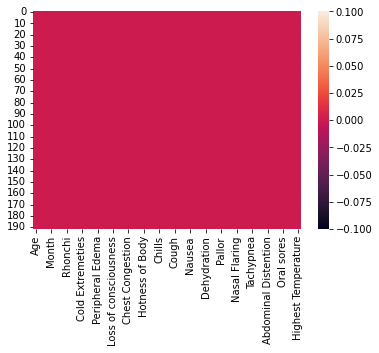

In [42]:
#find the missing data

null_data =dataset.isna()
sns.heatmap(null_data)

Sklearn Decision Trees does not handle categorical variables therefore we will convert some of the columns to numerical values using pandas.get_dummies() to convert the categorical variable into dummy/indicator variables.

In [9]:
from sklearn.preprocessing import LabelEncoder

# Encode labels of multiple columns at once

cols = pd.DataFrame(dataset, columns  = ['Age','Year','Sex', 'Onset', 'Hallucinations', 'Rhonchi',
       'Crepitations', 'Panic attacks', 'Cold Extremeties', 'Neck stiffness',
       'Skin Pustules', 'Peripheral Edema', 'Sweating', 'Eye Discharge',
       'Loss of consciousness', 'Chest Indrawing', 'Wheezing',
       'Chest Congestion', 'Rhinorrhea', 'GBM', 'Hotness of Body',
       'Inability to swallow', 'Feeding Difficulties', 'Chills', 'Headache',
       'Loss of Appetite', 'Cough', 'Convulsion', 'Abdominal Pain', 'Nausea',
       'Difficulty in Breathing', 'Diarrhoea', 'Dehydration',
       'Chest wall indrawing', 'Malnutrition', 'Pallor', 'Irritable', 'Melena',
       'Nasal Flaring', 'Vomiting', 'Delayed Milestone', 'Tachypnea',
       'Grunting', 'Palpitations', 'Abdominal Distention', 'Jaundice',
       'Hydrocephalus', 'Oral sores', 'Sick Looking', 'Positive RDT', "Highest Temperature"])

# Encode labels of multiple columns at once
cols = cols.apply(LabelEncoder().fit_transform)

# Print head
cols.head()

,Age,Year,Sex,Onset,Hallucinations,Rhonchi,Crepitations,Panic attacks,Cold Extremeties,Neck stiffness,Skin Pustules,Peripheral Edema,Sweating,Eye Discharge,Loss of consciousness,Chest Indrawing,Wheezing,Chest Congestion,Rhinorrhea,GBM,Hotness of Body,Inability to swallow,Feeding Difficulties,Chills,Headache,Loss of Appetite,Cough,Convulsion,Abdominal Pain,Nausea,Difficulty in Breathing,Diarrhoea,Dehydration,Chest wall indrawing,Malnutrition,Pallor,Irritable,Melena,Nasal Flaring,Vomiting,Delayed Milestone,Tachypnea,Grunting,Palpitations,Abdominal Distention,Jaundice,Hydrocephalus,Oral sores,Sick Looking,Positive RDT,Highest Temperature
0,1,1,1,5,0,0,0,0,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,10
1,1,2,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,32
2,1,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,12
3,2,2,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,1,0,31
4,5,2,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,37


**Setting Up The Decision Tree**

We will develop a Decision Tree Model that can predict if a child will have a positive or negative RDT test for Malaria based on the other features in the dataset. We declare the following variables

* **X** = as the Feature Matrix containing pediatric symptoms 
* **Y** = Positive RDT  (Malaria)

In [15]:
#now we declare the X variables for the model

X = pd.DataFrame(cols, columns = ['Age', 'Year', 'Sex','Onset', 'Hallucinations', 'Rhonchi',
       'Crepitations', 'Panic attacks', 'Cold Extremeties', 'Neck stiffness',
       'Skin Pustules', 'Peripheral Edema', 'Sweating', 'Eye Discharge',
       'Loss of consciousness', 'Chest Indrawing', 'Wheezing',
       'Chest Congestion', 'Rhinorrhea', 'GBM', 'Hotness of Body',
       'Inability to swallow', 'Feeding Difficulties', 'Chills', 'Headache',
       'Loss of Appetite', 'Cough', 'Convulsion', 'Abdominal Pain', 'Nausea',
       'Difficulty in Breathing', 'Diarrhoea', 'Dehydration',
       'Chest wall indrawing', 'Malnutrition', 'Pallor', 'Irritable', 'Melena',
       'Nasal Flaring', 'Vomiting', 'Delayed Milestone', 'Tachypnea',
       'Grunting', 'Palpitations', 'Abdominal Distention', 'Jaundice',
       'Hydrocephalus', 'Oral sores', 'Sick Looking','Highest Temperature'])

X[0:5]

,Age,Year,Sex,Onset,Hallucinations,Rhonchi,Crepitations,Panic attacks,Cold Extremeties,Neck stiffness,Skin Pustules,Peripheral Edema,Sweating,Eye Discharge,Loss of consciousness,Chest Indrawing,Wheezing,Chest Congestion,Rhinorrhea,GBM,Hotness of Body,Inability to swallow,Feeding Difficulties,Chills,Headache,Loss of Appetite,Cough,Convulsion,Abdominal Pain,Nausea,Difficulty in Breathing,Diarrhoea,Dehydration,Chest wall indrawing,Malnutrition,Pallor,Irritable,Melena,Nasal Flaring,Vomiting,Delayed Milestone,Tachypnea,Grunting,Palpitations,Abdominal Distention,Jaundice,Hydrocephalus,Oral sores,Sick Looking,Highest Temperature
0,1,1,1,5,0,0,0,0,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,10
1,1,2,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,32
2,1,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,12
3,2,2,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,1,31
4,5,2,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,37


In [11]:
#now we declare the Y variable for the model

Y = pd.DataFrame(cols, columns=['Positive RDT'])
Y[0:5]

,Positive RDT
0,0
1,0
2,0
3,0
4,0


# **Setting up the Decision Tree**

The X and Y are the arrays required before the split, the test_size represents the ratio of the testing dataset, and the random_state ensures that we obtain the same splits.

In [16]:
#We will be using train/test split on our decision tree

from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, Y, test_size=0.25, random_state=2)

In [24]:
#Print the shape of the X training set
print('Shape of X training set {}'.format(X_trainset.shape),'&',' Size of Y training set {}'.format(y_trainset.shape))

Shape of X training set (144, 50) &  Size of Y training set (144, 1)


In [23]:
#Print the shape of the Y testing set
print('Shape of X testing set {}'.format(X_testset.shape),'&',' Size of Y training set {}'.format(y_testset.shape))

Shape of X testing set (48, 50) &  Size of Y training set (48, 1)


# **Modelling**

We will first create an instance of the DecisionTreeClassifier called RDTTree. Inside of the classifier, specify criterion="entropy" so we can see the information gain of each node.

In [19]:
#We performing multi-class classification on a dataset.

from sklearn.tree import DecisionTreeClassifier

RDTTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
RDTTree # it shows the default parameters

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [28]:
#We fit the data with the training feature matrix "X_trainset" and training response vector "y_trainset"
RDTTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

# **Prediction**

We then make some predictions on the testing dataset and store it into a variable called predTree.


In [22]:
#After fitting the model we try to predict values from the test set
predTree = RDTTree.predict(X_testset)
print (predTree [0:6])
print (y_testset [0:6])

[1 1 1 1 0 1]
     Positive RDT
23              0
123             1
35              1
10              0
48              0
2               0


# **Model Evaluation**

In [29]:
#import libraries to check the model accuracy

from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.6458333333333334


# **Visualization**

In [30]:
#import visualization Libraries
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

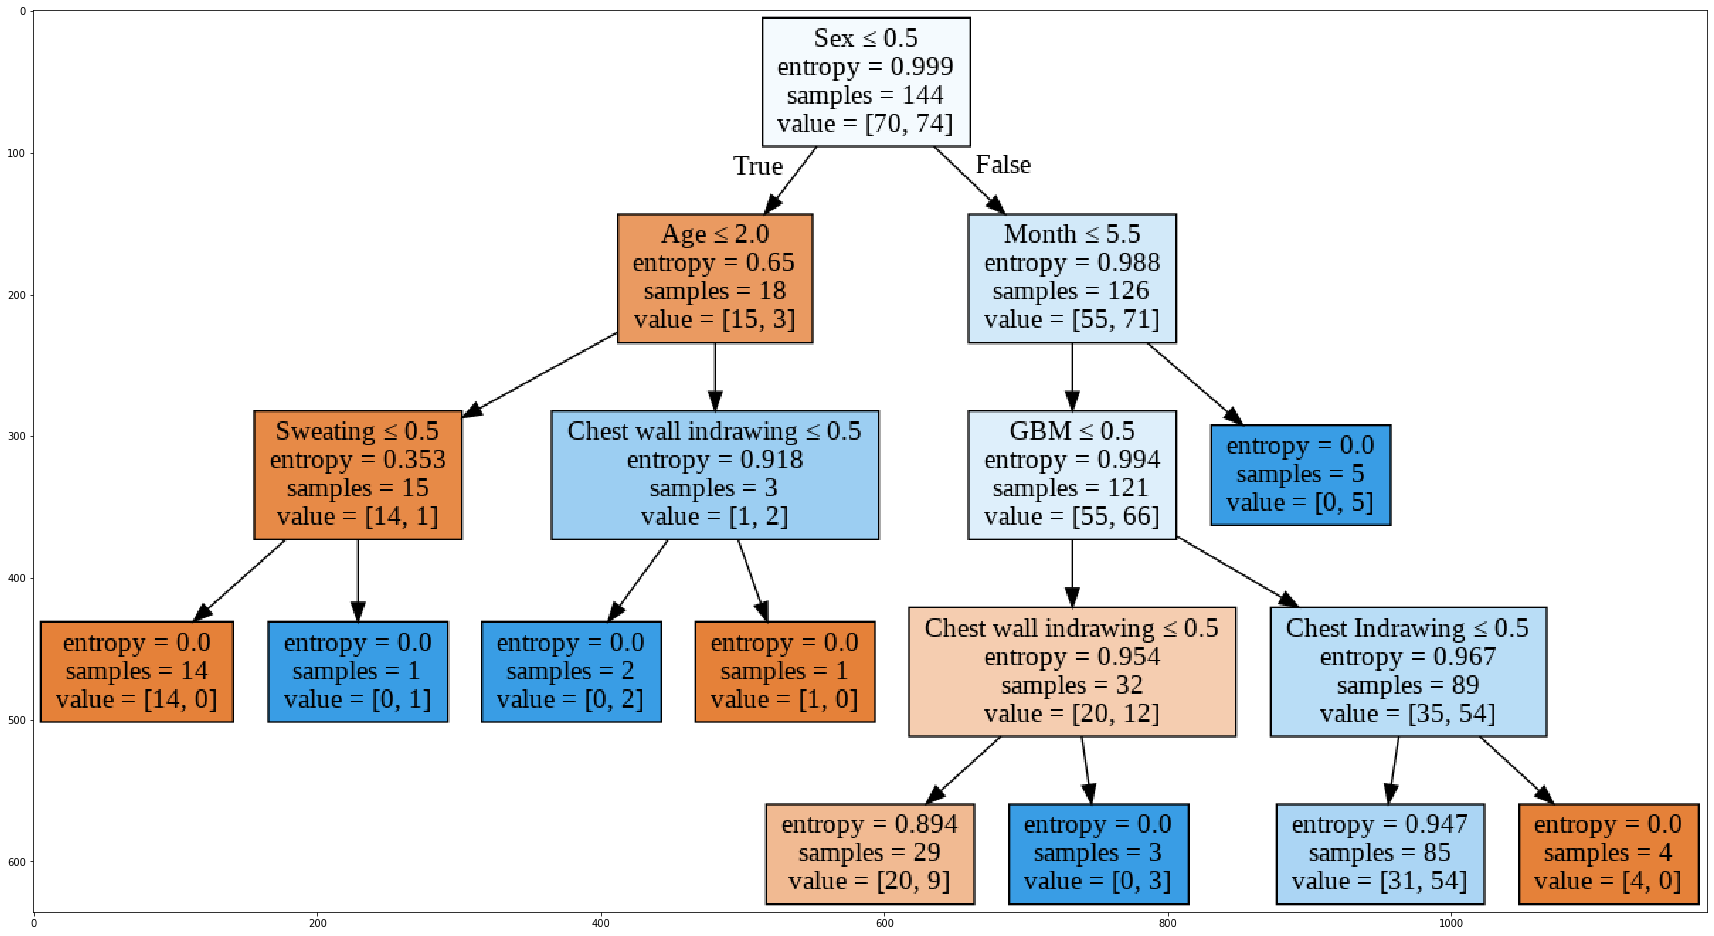

In [32]:
dot_data = StringIO()
filename = "RDTtree.png"
featureNames = dataset.columns[0:50]
out=tree.export_graphviz(RDTTree,feature_names=featureNames, out_file=dot_data, filled=True, special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(30, 20))
plt.imshow(img,interpolation='nearest')